In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart = pd.read_csv('heart.csv', parse_dates=[5])

In [3]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [5]:
heart.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


In [6]:
heart # dataframe

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
# keep chest pain type in dataset
heart[heart['HeartDisease'] == 1]['ChestPainType'].value_counts()

ASY    392
NAP     72
ATA     24
TA      20
Name: ChestPainType, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

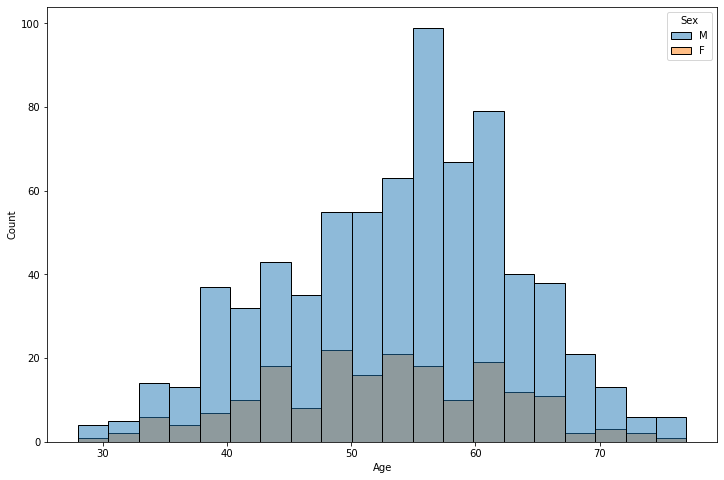

In [8]:
plt.figure(figsize=(12,8))
sns.histplot(x='Age', data=heart, hue='Sex', bins=20)

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

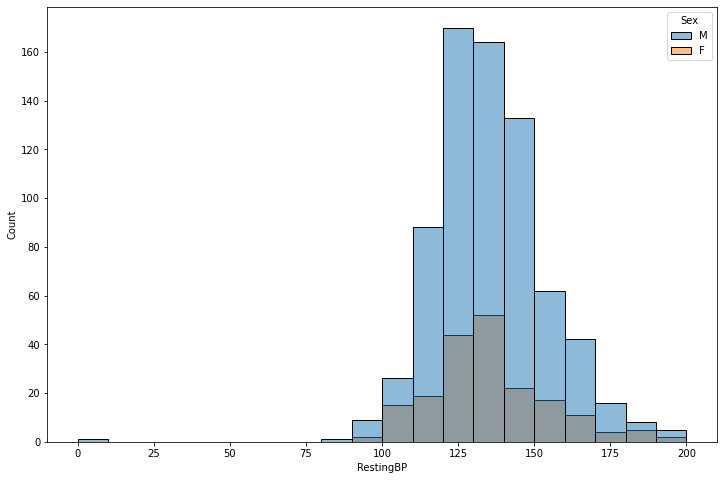

In [9]:
plt.figure(figsize=(12,8))
sns.histplot(x='RestingBP', data=heart, hue='Sex', bins=20)

In [10]:
heart['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

(0.0, 500.0)

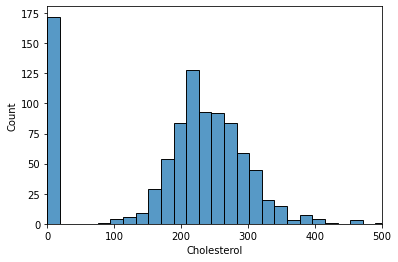

In [11]:
sns.histplot(data=heart['Cholesterol'])
plt.xlim(0,500)

In [12]:
heart[heart['Cholesterol'] == 0].count()

Age               172
Sex               172
ChestPainType     172
RestingBP         172
Cholesterol       172
FastingBS         172
RestingECG        172
MaxHR             172
ExerciseAngina    172
Oldpeak           172
ST_Slope          172
HeartDisease      172
dtype: int64

In [13]:
heart['Cholesterol'].median()

223.0

In [14]:
heart['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

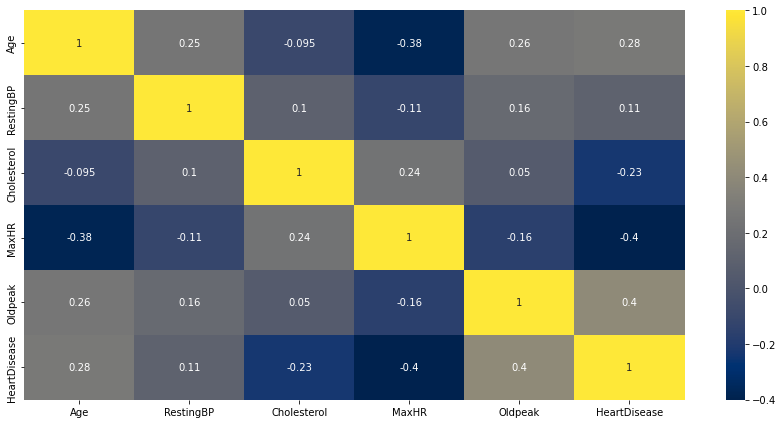

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(data=heart.corr(), annot=True, cmap='cividis')
plt.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='MaxHR'>

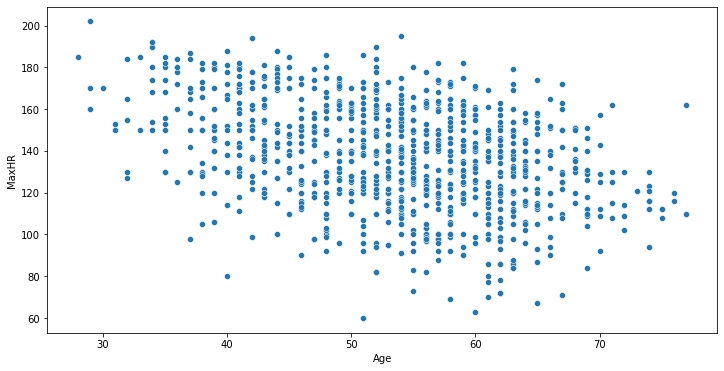

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='MaxHR', data=heart)
# The older the lower the maximum heart rate

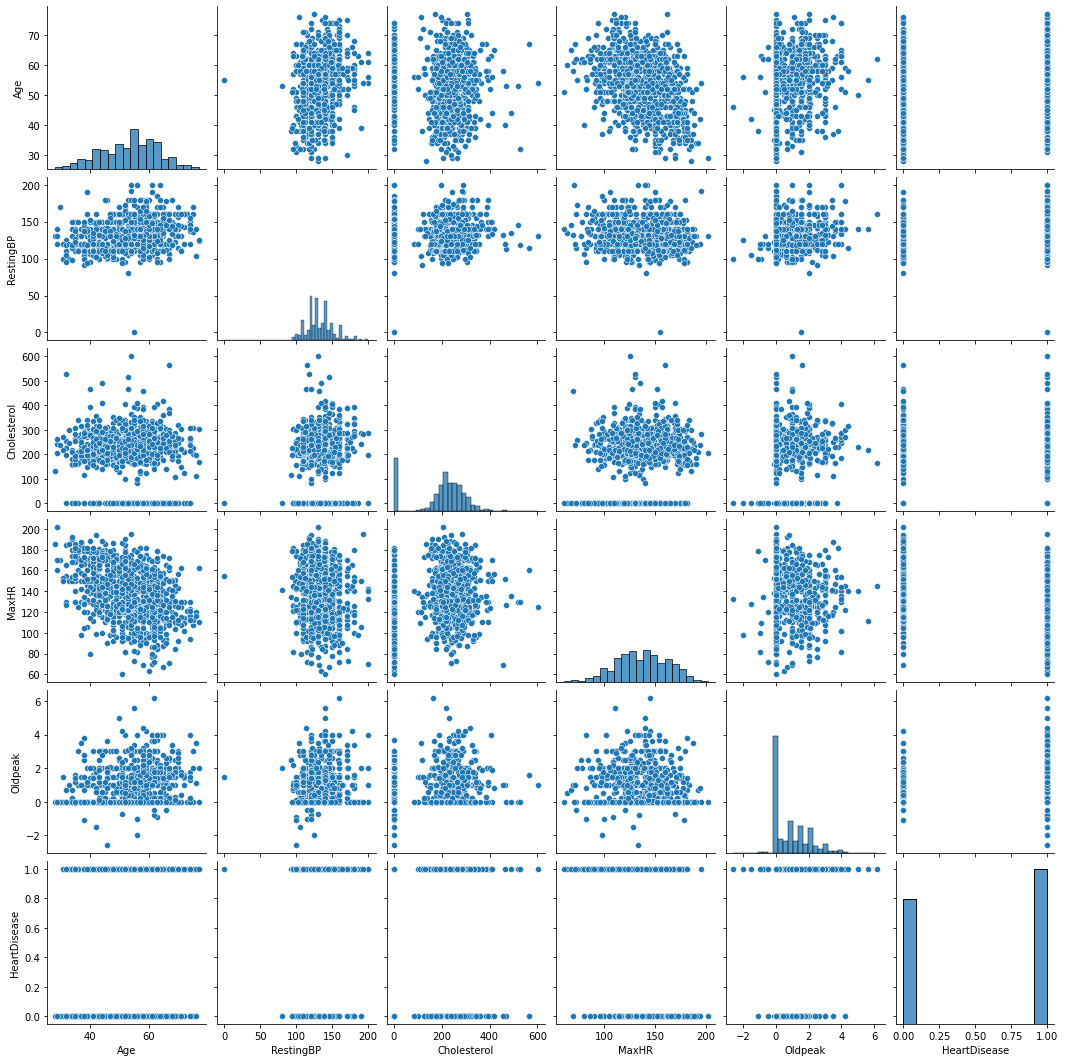

In [17]:
sns.pairplot(data=heart)

In [18]:
# which columns to keep?
X = heart.drop(['ST_Slope', 'HeartDisease'], axis=1)
y = heart['HeartDisease']

In [19]:
# replace ExerciseAngina with 0s and 1s
X['ExerciseAngina'].replace(to_replace=['N', 'Y'], value=[0,1], inplace=True)
X['Sex'].replace(to_replace=['M', 'F'], value=[0,1], inplace=True)

In [20]:
X = pd.get_dummies(data=X, drop_first=True)

In [21]:
X.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'MaxHR', 'ExerciseAngina',
       'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'FastingBS_1', 'RestingECG_Normal', 'RestingECG_ST'],
      dtype='object')

In [22]:
# rename FastingBS_1
X.columns = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'MaxHR', 'ExerciseAngina',
       'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'FastingBS', 'RestingECG_Normal', 'RestingECG_ST']

In [23]:
# normalize
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [24]:
ct = ColumnTransformer([
        ('myTransformer', StandardScaler(), ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])
    ], remainder='passthrough')

In [25]:
# later needed for polynomial features
X_new = X

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
X_train = ct.fit_transform(X_train)

In [29]:
from sklearn.linear_model import LogisticRegressionCV

In [30]:
model = LogisticRegressionCV()

In [31]:
model.fit(X_train,y_train)

LogisticRegressionCV()

In [32]:
X_test = ct.transform(X_test)
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
print(confusion_matrix(y_test, y_pred))

[[67 16]
 [11 90]]


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        83
           1       0.85      0.89      0.87       101

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



### Idea
it is difficult to say with certainty that a person gets a heart stroke. it is more useful to have an idea how likely it is.
that is why it is better to show probabilities, because then there is still time to react and change something.

In [36]:
y_pred = model.predict_proba(X_test)

In [37]:
print(np.round(y_pred[:,1], 2))

[0.86 0.02 0.16 0.94 0.07 0.05 0.02 0.34 0.66 0.21 0.54 0.5  0.95 0.17
 0.82 0.88 0.89 0.94 0.98 0.86 0.9  0.03 0.83 0.95 0.28 0.68 0.36 0.14
 0.95 0.94 0.31 0.86 0.06 0.19 0.76 0.13 0.18 0.11 0.89 0.24 0.99 0.04
 0.77 0.64 0.97 0.27 0.92 0.98 0.96 0.11 0.7  0.08 0.72 0.49 0.16 0.27
 0.79 0.95 0.28 0.58 0.32 0.68 0.3  0.8  0.33 0.34 0.35 0.24 0.75 0.07
 0.23 0.43 0.02 0.17 0.71 0.06 0.94 0.6  0.5  0.9  0.02 0.95 1.   0.17
 0.86 0.93 0.73 0.05 0.72 0.99 0.63 0.15 0.85 0.8  0.96 0.16 0.27 0.13
 0.08 0.51 0.97 0.88 0.88 0.1  0.97 0.25 0.94 0.1  0.92 0.86 0.06 0.12
 0.43 0.96 0.99 0.74 0.82 0.13 0.93 0.89 0.83 0.78 0.41 0.01 0.56 0.31
 0.93 0.9  0.18 0.43 0.09 0.89 0.23 0.85 0.93 0.96 0.69 0.97 0.07 0.92
 0.17 0.09 0.11 0.99 0.39 0.07 0.92 0.96 0.9  0.2  0.74 0.91 0.99 0.9
 0.43 0.91 0.89 0.87 0.65 0.98 0.87 0.12 0.04 0.05 0.64 0.19 0.97 0.96
 0.89 0.61 0.98 0.58 0.07 0.83 0.98 0.79 0.99 0.65 0.92 0.03 0.32 0.91
 0.18 0.76]


### Polynomial Features
since I am not satisfied with results and features are not so useful to predict (see pairplot) - I want to try to predict based on polynomial features. maybe features of a higher degree are more useful to predict heart attacks.

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [40]:
ct2 = ColumnTransformer([
        ('myPolyTransformer', polynomial_converter, ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])
    ], remainder='passthrough')

In [41]:
X = ct2.fit_transform(X_new)

In [42]:
X_new

,Age,Sex,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS,RestingECG_Normal,RestingECG_ST
0,40,0,140,289,172,0,0.0,1,0,0,0,1,0
1,49,1,160,180,156,0,1.0,0,1,0,0,1,0
2,37,0,130,283,98,0,0.0,1,0,0,0,0,1
3,48,1,138,214,108,1,1.5,0,0,0,0,1,0
4,54,0,150,195,122,0,0.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,132,0,1.2,0,0,1,0,1,0
914,68,0,144,193,141,0,3.4,0,0,0,1,1,0
915,57,0,130,131,115,1,1.2,0,0,0,0,1,0
916,57,1,130,236,174,0,0.0,1,0,0,0,0,0


In [43]:
sc2 = StandardScaler()
X[:][0:-8] = sc2.fit_transform(X[:][0:-8])

In [44]:
# after normalization, we still have to do a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
model = LogisticRegressionCV()

In [46]:
model.fit(X_train,y_train)

C:\Users\wanke\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wanke\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

C:\Users\wanke\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wanke\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV()

In [47]:
y_pred = model.predict(X_test)

In [48]:
print(confusion_matrix(y_test, y_pred))

[[73 15]
 [12 84]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        88
           1       0.85      0.88      0.86        96

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [52]:
# save model
from joblib import dump, load
dump(model, 'final_model.joblib')

['final_model.joblib']

In [ ]:
# load model; to note: converter can be saved the same way and is required to get the input in the right format
loaded_model = load('final_model.joblib')

## Conclusion
In this project, I started with a simpler model - I tried to reduce the number of features, but since the performance was not as good as I expected (accuracy < 80), I added more and more features to the equation. At the end, I wanted to experiment with higher polynomial features. It turned out that those do not yield any performance increase. In fact, most of the time, the model with those performed worst than without.